# Quantization - introduction 

In [2]:
import torch
import matplotlib.pyplot as plt
# default size of figures
plt.rcParams['figure.figsize'] = [10, 10]

Quantization is a process of representation change: from real values to discrete space.

Floating point representation has good enough precision to assume it as a real value.

As our discrete space, we select fixed point representation with:
- sign (most significant bit (MSB))
- width of 8 bits
- point position after second bit (counted from the less significant bit (LSB)) (precision).

Note: bit of sign is one of integer bits.

Process of quantization is based on few steps:

1) transformation real value $V$ to discrete space $q$:

$q = \max\left(0; \min\left(UINT\_MAX;round \left(\frac{V}{precision} - offset \right) \right)\right)$

2) retransformation from discrete space to floating point space:

$Q = precision \times \left(q - offset \right)$ 

1. Calculate number of integer bits.

In [3]:
SIGNED = 1
BIT_WIDTH = 4
PRECISION_BITS = 2  # point position

INT_BITS = BIT_WIDTH - PRECISION_BITS

# SIGN bit is also integer bit !

2. To perform quantization, there is needed a set of real values.

Please, create a tensor `R` with values from linear space of range -2.5 to 2.5 and length of 1000 elements.

Plot tensor on both axis X and Y.

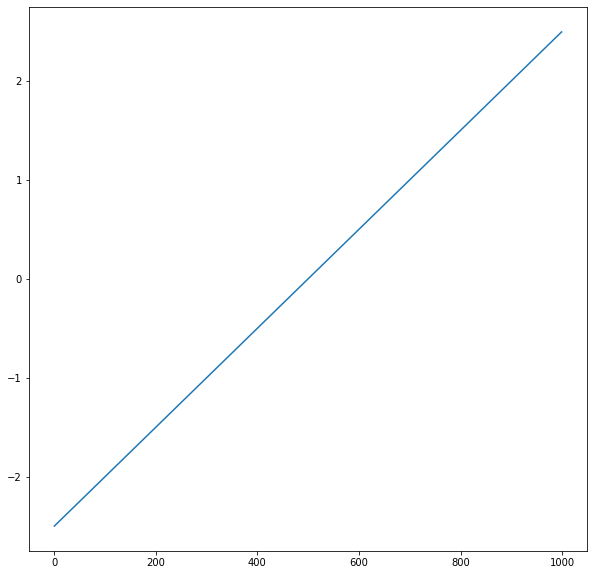

In [7]:
R = torch.linspace(-2.5, 2.5, 1000)

plt.plot(R)
plt.show()

3. Determinate some descriptive constants of fixed point representation:
- MIN_INT_VALUE  - for the whole representation, so for integer on `BIT_WIDTH` 
- MAX_UINT_VALUE  - for the whole representation, so for unsigned integer on `BIT_WIDTH`
- PRECISION - distance between next fixed point numbers, based on `PRECISION_BITS`(size of fractional part) - minimal fractional value

In [11]:
MIN_INT_VALUE = -(2 ** (BIT_WIDTH - 1))
MAX_UINT_VALUE = 2 ** (BIT_WIDTH - 1) - 1
PRECISION = 2 ** -PRECISION_BITS


print(MIN_INT_VALUE, MAX_UINT_VALUE, PRECISION, sep="\n")

-8
7
0.25


For tasks 4 - 9 plot resulted tensors.

Add XY labels, title, legend.

As X coordinates use `R` tensor.

4. Scale: Transform tensor `R` to "continues integer" space:

Hint: use `PRECISION`.

Result tensor: `scaled`


In [12]:
scaled = R/PRECISION

5. Translate: Transform tensor `scaled` to "continues unsigned integer" space:

Hint: use `MIN_INT_VALUE`.

Result tensor: `transposed`

In [13]:
scaled = R/PRECISION

6. Round: Transform tensor `transposed` to discrete space with `floor` method:

This operation is the main part of quantization.

It is not possible to revert this operation.

Result tensor: `rounded`

In [15]:
rounded = torch.floor(scaled)

7. Limit: Limit tensor `rounded` to range `[0;MAX_UINT_VALUE]`:

It is not possible to revert this operation, the same as previous.

Result tensor: `limited`

In [16]:
limited = (7/20)*torch.add(rounded, 2)

8. Retranslate: Transform tensor `limited` to integer space:

Hint: see point 5.

Result tensor: `retranslated`

In [17]:
retranslated = limited - MIN_INT_VALUE

9. Rescale: Transform tensor `retranslated` to real space:

Hint: see point 4.

Result tensor: `rescaled`

In [18]:
rescaled = retranslated/PRECISION

10. Assign `rescaled` tensor to `quantized` variable.

Plot `quantized` and `R` tensors on the same plot.

In [ ]:
all_transforms = [scaled, transposed, rounded, limited, retranslated, rescaled]
all_transforms_legends = ats_lgs = ["scaled", "transposed", "rounded", "limited", "retranslated", "rescaled"]
for i in range(6):
    plt.plot(all_transforms[i])
plt.legend(ats_lgs)
plt.show()

quantized = rescaled


plt.subplot(1, 2, 1)
plt.plot(quantized)
plt.title("quantized")
plt.subplot(1, 2, 2)
plt.plot(R)
plt.title("R")
plt.show()

11. Based on the steps 3 - 9 define a function `fixed_point_quantize`.

Function should takes arguments:
- `R` - floating point tensor, which will be quantized
- `bit_width` - fixed point bit width
- `precision_bits` - number of precision bits / point position
- `round_method` - method of rounding, one of 'round', 'floor', 'ceil'.

Function should return quantized tensor.

Note: Do not plot anything inside function.

In [19]:
def signed_fixed_point_quantize(R: torch.Tensor,
                                bit_width: int,
                                precision_bits: int,
                                round_method:str = 'round') -> torch.Tensor:
    ...
    quantized = ...
    
    return quantized


NameError: ignored

12. Test function on previously created `R` tensor.

Display results in the same way as in point 9.

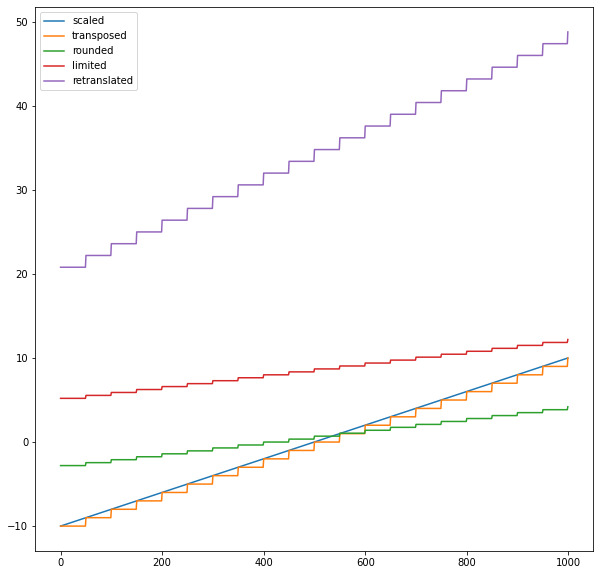

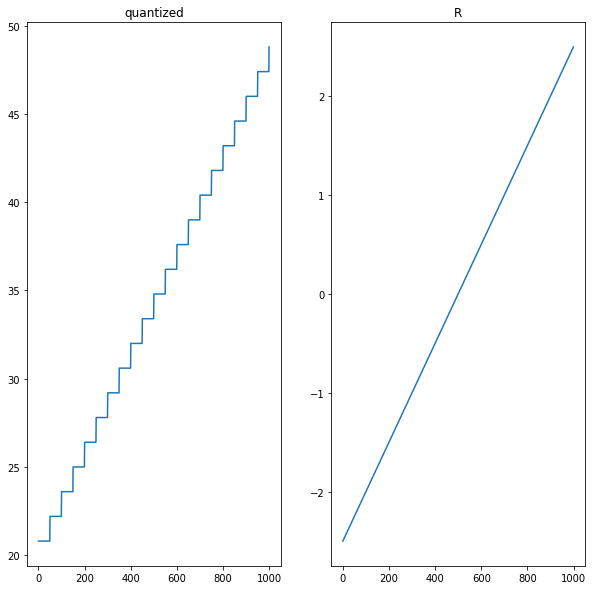

In [21]:
all_transforms = [scaled, rounded, limited, retranslated, rescaled]
all_transforms_legends = ats_lgs = ["scaled", "transposed", "rounded", "limited", "retranslated", "rescaled"]
for i in range(len(all_transforms)):
    plt.plot(all_transforms[i])
plt.legend(ats_lgs)
plt.show()

quantized = rescaled


plt.subplot(1, 2, 1)
plt.plot(quantized)
plt.title("quantized")
plt.subplot(1, 2, 2)
plt.plot(R)
plt.title("R")
plt.show()

13. `*` Additional:

Define unsigned quantization function and test it on `R` tensor.

In [22]:
def unsigned_fixed_point_quantize(R: torch.Tensor,
                                  bit_width: int,
                                  precision_bits: int,
                                  round_method:str = 'round') -> torch.Tensor:
    MIN_INT_VALUE = -(2 ** (bit_width - 1))
    MAX_UINT_VALUE = 2 ** (bit_width - 1) - 1
    PRECISION = 2 ** -(precision_bits)
    scaled = R/PRECISION
    transposed = scaled - MIN_INT_VALUE
    if round_method == "round":
       rounded = torch.round(transposed)
    elif round_method == "floor":
       rounded = torch.floor(transposed)
    elif round_method == "ceil":
       rounded = torch.ceil(transposed)
    else:
       rounded = torch.round(transposed)  # Use the default method if method is invalid
    limited = (7/20)*torch.add(rounded, 2)
    retranslated = limited - MIN_INT_VALUE
    quantized = retranslated/PRECISION
   
    return quantized



14. `**` Additional:

Apply quantization on image `mandrill.jpg`.

Use opencv function `imread` to read image with arguments: path_to_file and value 0 (as second arg).

Function returns numpy ndarray. Convert it to torch.Tensor and divide by 255 (normalization).

Display image with `plt.imshow`.

Apply signed quantization of 4 bits, 3 bits of precision and 'floor' rounding.

Plot resultant image. 


In [ ]:
import cv2 as cv # import opencv package


15. You can leave a feedback, if you want :)

16. Exercises please upload this file (*.ipynb) to UPEL.